In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [6]:
%cd 'Analisi Margot '/
%ls

/gdrive/MyDrive/Horror Excel/Progetto Covid Gruppo Horror/Analisi Margot 
'04 - Tasso di mortalità normalizzato per regione.py'       Dati-campione-2013-2023.csv
'05 - Grafico_Italia_Mappa_Incidenza_guariti.py'            Deceduti.png
'06 - Grafico_Italia_Mappa_Incidenza_Decessi.py'            Geo_Clean/
'07 - Grafico_Italia_Mappa_Incidenza_current_positive.py'   guariti.png
'17 - analisi_Italy vs ue.py'                               Mappa_inquinamento_regionale.png
'18 - Spunti Correlazione - Scuola.py'                      MappaProporzioneDecessi.png
 Campioni_Invalsi_clean.csv                                'Nuovi positivi.png'
 covid19_europe.csv                                         TOP25xprovincia.py


In [10]:
# Caricamento del file CSV
campioni_invalsi_df = pd.read_csv("Dati-campione-2013-2023.csv", sep=";")

In [11]:
# pulizia dei dati (conversione del formato dei numeri)
campioni_invalsi_df.replace({',': '.'}, regex=True, inplace=True)
num_aggiustamento = ['Punteggio_WLE', 'ES', 'Deviazione_standard_WLE', 'ES_SD', 'Percentile5',
                  'Percentile25', 'Percentile75', 'Percentile95']
campioni_invalsi_df[num_aggiustamento] = campioni_invalsi_df[num_aggiustamento].apply(pd.to_numeric, errors='coerce')

In [12]:
# conversione dei tipi di dati
campioni_invalsi_df['Anno'] = campioni_invalsi_df['Anno'].astype(str)
campioni_invalsi_df['Grado'] = campioni_invalsi_df['Grado'].astype(str)

In [13]:
# filtro per il grado 5 e la materia Matematica
filtro_grado_materia = (campioni_invalsi_df['Grado'] == '5') & (campioni_invalsi_df['Materia'] == 'Italiano')
df_filtrato = campioni_invalsi_df[filtro_grado_materia]

In [14]:
#raggruppamento dei dati per anno, ripartizione_geografica e materia
grouped_data = df_filtrato.groupby(['Anno', 'Ripartizione_geografica', 'Materia'])['Punteggio_WLE'].mean().reset_index()

In [15]:
#filtro dei dati per includere solo le regioni di interesse
regioni_interesse = ['Lombardia', 'Veneto', 'Piemonte', 'Emilia Romagna', 'Lazio', 'Valle d\'Aosta', 'Marche']
grouped_data_filtrato = grouped_data[grouped_data['Ripartizione_geografica'].isin(regioni_interesse)]

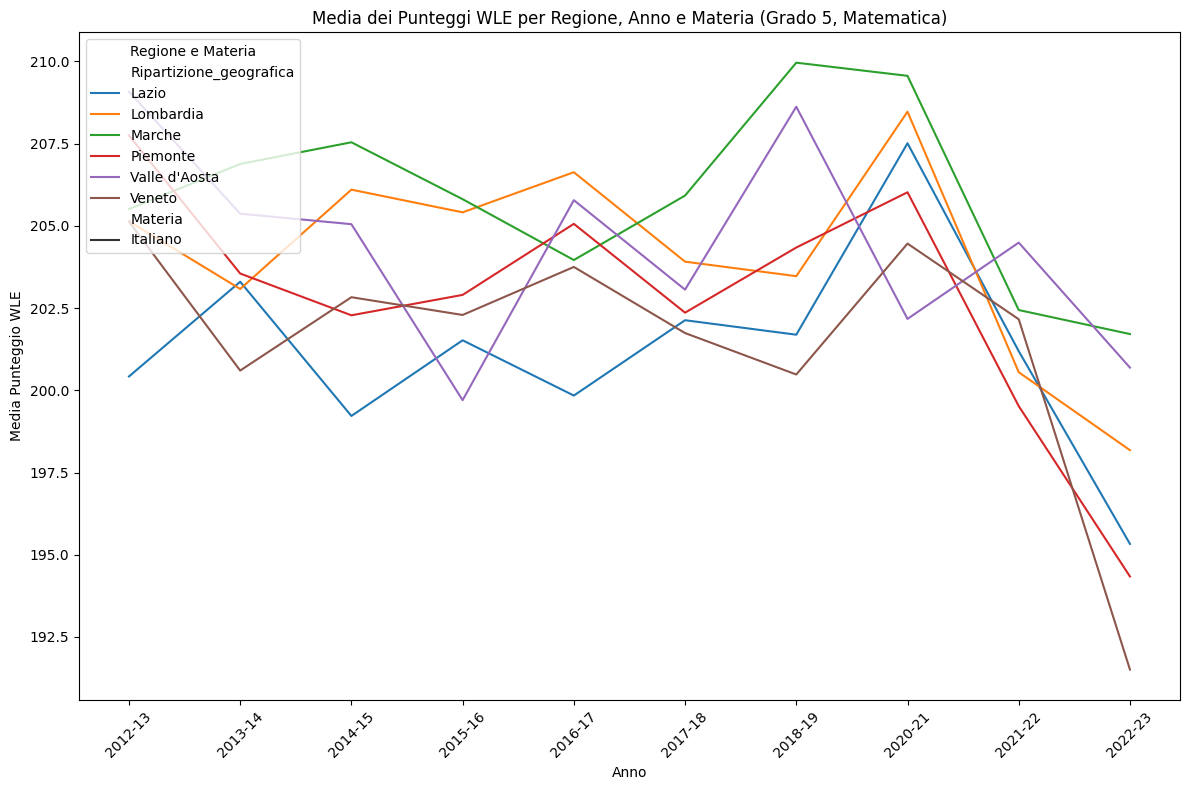

In [16]:
# Visualizzazione dei dati filtrati
plt.figure(figsize=(12, 8))
sns.lineplot(x='Anno', y='Punteggio_WLE', hue='Ripartizione_geografica', style='Materia', data=grouped_data_filtrato)
plt.title("Media dei Punteggi WLE per Regione, Anno e Materia (Grado 5, Matematica)")
plt.ylabel("Media Punteggio WLE")
plt.xlabel("Anno")
plt.xticks(rotation=45)
plt.legend(title='Regione e Materia', loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:


# Pulizia dei dati (conversione del formato dei numeri)
campioni_invalsi_df.replace({',': '.'}, regex=True, inplace=True)
num_aggiustamento = ['Punteggio_WLE', 'ES', 'Deviazione_standard_WLE', 'ES_SD', 'Percentile5',
                  'Percentile25', 'Percentile75', 'Percentile95']
campioni_invalsi_df[num_aggiustamento] = campioni_invalsi_df[num_aggiustamento].apply(pd.to_numeric, errors='coerce')

# Conversione dei tipi di dati
campioni_invalsi_df['Anno'] = campioni_invalsi_df['Anno'].astype(str)
campioni_invalsi_df['Grado'] = campioni_invalsi_df['Grado'].astype(str)

# Filtraggio per il grado 5 e la materia Matematica
filtro_grado_materia = (campioni_invalsi_df['Grado'] == '5') & (campioni_invalsi_df['Materia'] == 'Italiano')
df_filtrato = campioni_invalsi_df[filtro_grado_materia]

# Raggruppamento dei dati per Anno, Ripartizione_geografica e Materia
grouped_data = df_filtrato.groupby(['Anno', 'Ripartizione_geografica', 'Materia'])['Punteggio_WLE'].mean().reset_index()

# Filtraggio dei dati per includere solo le regioni di interesse
regioni_interesse = ['Lombardia', 'Veneto', 'Piemonte', 'Emilia Romagna', 'Lazio', 'Valle d\'Aosta', 'Marche']
grouped_data_filtrato = grouped_data[grouped_data['Ripartizione_geografica'].isin(regioni_interesse)]

# Visualizzazione dei dati filtrati
plt.figure(figsize=(12, 8))
sns.lineplot(x='Anno', y='Punteggio_WLE', hue='Ripartizione_geografica', style='Materia', data=grouped_data_filtrato)
plt.title("Media dei Punteggi WLE per Regione, Anno e Materia (Grado 5, Matematica)")
plt.ylabel("Media Punteggio WLE")
plt.xlabel("Anno")
plt.xticks(rotation=45)
plt.legend(title='Regione e Materia', loc='upper left')
plt.tight_layout()
plt.show()